author : Saiful Bahri Irfanto

In [0]:
#import library yang dibutuhkan
import matplotlib.pyplot as plt #data visualization
import pandas as pd # data analis
import pylab as pl 
import numpy as np #scientific computing
from mlxtend.frequent_patterns import apriori #algorithm  
from mlxtend.frequent_patterns import association_rules

Load dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
df = pd.read_csv("/content/drive/My Drive/analis data/dataset/supermarket_sales - Sheet1.csv")

#mengambil data dari google drive
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
Items={}
for item in df['Product line']:
    if item in Items:
        Items[item]= Items[item] + 1
    else:
        Items[item]=1
        
keys=[]
vals=[]
for i,k in Items.items():
    if k>30:
        keys.append(i)
        vals.append(k)

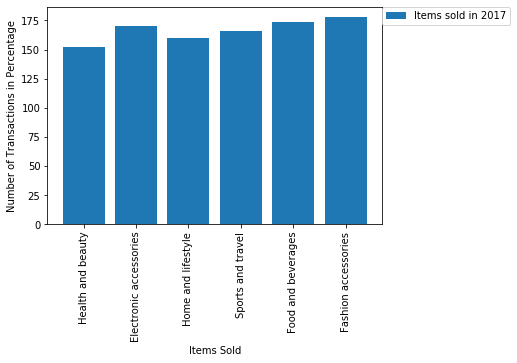

In [0]:
plt.bar(keys, vals, label="Items sold in 2017")
plt.rcParams["figure.figsize"] = [20,10]
plt.ylabel ('Number of Transactions in Percentage')
plt.xlabel ('Items Sold')
plt.xticks(list(keys), rotation=90)
plt.legend (bbox_to_anchor=(1, 1), loc="best", borderaxespad=0.)

plt.show()

In [0]:
df['Quantity']= 1

In [0]:
df.head(7)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,1,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,1,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,1,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,1,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,1,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,1,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,1,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8


In [0]:
basket = df.groupby(['Rating', 'Product line'])['Quantity'].sum().unstack().fillna(0)
print(basket.head())

Product line  Electronic accessories  ...  Sports and travel
Rating                                ...                   
4.0                              1.0  ...                1.0
4.1                              3.0  ...                4.0
4.2                              2.0  ...                5.0
4.3                              4.0  ...                2.0
4.4                              3.0  ...                1.0

[5 rows x 6 columns]


In [0]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [0]:
frequent_itemsets = apriori(basket_sets,min_support=0.03,  use_colnames=True)
print(frequent_itemsets)

     support                                           itemsets
0   0.950820                           (Electronic accessories)
1   0.967213                              (Fashion accessories)
2   0.918033                               (Food and beverages)
3   0.901639                                (Health and beauty)
4   0.918033                               (Home and lifestyle)
..       ...                                                ...
58  0.754098  (Fashion accessories, Electronic accessories, ...
59  0.688525  (Fashion accessories, Electronic accessories, ...
60  0.672131  (Electronic accessories, Home and lifestyle, F...
61  0.704918  (Fashion accessories, Home and lifestyle, Food...
62  0.655738  (Fashion accessories, Electronic accessories, ...

[63 rows x 2 columns]


In [0]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Food and beverages),(Fashion accessories),0.918033,0.967213,0.901639,0.982143,1.015436,0.013706,1.836066
1,(Fashion accessories),(Food and beverages),0.967213,0.918033,0.901639,0.932203,1.015436,0.013706,1.209016
2,(Home and lifestyle),(Fashion accessories),0.918033,0.967213,0.901639,0.982143,1.015436,0.013706,1.836066
3,(Fashion accessories),(Home and lifestyle),0.967213,0.918033,0.901639,0.932203,1.015436,0.013706,1.209016
4,(Home and lifestyle),(Food and beverages),0.918033,0.918033,0.868852,0.946429,1.030931,0.026068,1.530055
